In [1]:
import numpy as np
import pandas as pd
from mat4py import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.utils import resample

import tensorflow
from tensorflow.keras.callbacks import ModelCheckpoint
import sklearn
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization,Concatenate,concatenate, Input
from tensorflow.keras.layers import Conv2D, Conv1D, MaxPooling1D
#from tensorflow.keras.utils import np_utils
#from tensorflow.keras.utils.vis_utils import model_to_dot
from tensorflow.keras.regularizers import l2

In [2]:
list_string=['ucddb002','ucddb003','ucddb005','ucddb006','ucddb007','ucddb009',\
             'ucddb010','ucddb012','ucddb014','ucddb015','ucddb017',\
             'ucddb019','ucddb020','ucddb021','ucddb022','ucddb023','ucddb024',\
             'ucddb025','ucddb026','ucddb027','ucddb028']#'ucddb008','ucddb011','ucddb013','ucddb014',


'''list_string=['ucddb002','ucddb003','ucddb005','ucddb006','ucddb007','ucddb008','ucddb009',\
             'ucddb010','ucddb011','ucddb012','ucddb013','ucddb014','ucddb015','ucddb017',\
             'ucddb018','ucddb019','ucddb020','ucddb021','ucddb022','ucddb023','ucddb024',\
             'ucddb025','ucddb026','ucddb027','ucddb028']'''

'''list_string=['ucddb005','ucddb007','ucddb008','ucddb009',\
             'ucddb011','ucddb015','ucddb017',\
             'ucddb020','ucddb021','ucddb022',\
             'ucddb025'] #'ucddb022''ucddb025' 'ucddb007'''

valid_features=np.zeros((1,1408))
test_features=np.zeros((1,1408))
valid_labels=np.zeros((1,1))
test_labels=np.zeros((1,1))
for l in list_string:
        
        
        abdo_valid = loadmat('D:\\PhD topics\\Datasets\\sleep_apnea\\selected\\'+l+'_abdo_valid.mat')
        abdo_valid = np.array(abdo_valid['abdo_valid'])
        abdo_valid_labels=loadmat('D:\\PhD topics\\Datasets\\sleep_apnea\\selected\\'+l+'_valid_labels.mat')
        abdo_valid_labels = np.array(abdo_valid_labels['class_valid'])
        valid_features=np.append(valid_features,abdo_valid,axis=0)
        valid_labels=np.append(valid_labels,abdo_valid_labels)
       
        
        abdo_test = loadmat('D:\\PhD topics\\Datasets\\sleep_apnea\\selected\\'+l+'_abdo_test.mat')
        abdo_test = np.array(abdo_test['abdo_test'])
        abdo_test_labels=loadmat('D:\\PhD topics\\Datasets\\sleep_apnea\\selected\\'+l+'_test_labels.mat')
        abdo_test_labels = np.array(abdo_test_labels['class_test'])
        test_features=np.append(test_features,abdo_test,axis=0)
        test_labels=np.append(test_labels,abdo_test_labels)
        
abdo_valid=valid_features[1:,:]
#abdo_valid=np.expand_dims(abdo_valid, axis=2)
valid_labels=valid_labels[1:]
valid_labels = valid_labels.flatten()

abdo_test=test_features[1:,:]
#abdo_test=np.expand_dims(abdo_test, axis=2)
test_labels=test_labels[1:]
test_labels = test_labels.flatten()

In [3]:
train_features=np.zeros((1,1408))

train_labels=np.zeros((1,1))

for l in list_string:
        abdo_train = loadmat('D:\\PhD topics\\Datasets\\sleep_apnea\\selected\\'+l+'_abdo_train.mat')
        abdo_train = np.array(abdo_train['abdo_train'])
        abdo_train_labels=loadmat('D:\\PhD topics\\Datasets\\sleep_apnea\\selected\\'+l+'_train_labels.mat')
        abdo_train_labels = np.array(abdo_train_labels['class_train'])
        train_features=np.append(train_features,abdo_train,axis=0)
        train_labels=np.append(train_labels,abdo_train_labels)
        
abdo_train=train_features[1:,:]
#abdo_train=np.expand_dims(abdo_train, axis=2)
train_labels=train_labels[1:]
train_labels = train_labels.flatten()

In [4]:
abdo_train_mean=np.mean(abdo_train)
abdo_train_std=np.std(abdo_train)

In [5]:
for i in range(abdo_train.shape[0]):
    abdo_train[i,:]=(abdo_train[i,:]-abdo_train_mean)/abdo_train_std
    
for i in range(abdo_valid.shape[0]):
    abdo_valid[i,:]=(abdo_valid[i,:]-abdo_train_mean)/abdo_train_std
    
for i in range(abdo_test.shape[0]):
    abdo_test[i,:]=(abdo_test[i,:]-abdo_train_mean)/abdo_train_std
    
#abdo_train=(abdo_train-abdo_train_mean)/abdo_train_std
#abdo_valid=(abdo_valid-abdo_train_mean)/abdo_train_std
#abdo_test=(abdo_test-abdo_train_mean)/abdo_train_std

abdo_train=np.expand_dims(abdo_train, axis=2)
abdo_valid=np.expand_dims(abdo_valid, axis=2)
abdo_test=np.expand_dims(abdo_test, axis=2)

In [6]:
y_train=train_labels
y_valid=valid_labels
y_test=test_labels

In [7]:
tensorflow.keras.backend.clear_session()

In [8]:
num_classes=2

In [9]:
y_train_encoder = sklearn.preprocessing.LabelEncoder()
y_train_num = y_train_encoder.fit_transform(y_train)
y_train_wide = tensorflow.keras.utils.to_categorical(y_train_num, num_classes)

y_valid_num = y_train_encoder.fit_transform(y_valid)
y_valid_wide = tensorflow.keras.utils.to_categorical(y_valid_num, num_classes)

y_test_num = y_train_encoder.fit_transform(y_test)
y_test_wide = tensorflow.keras.utils.to_categorical(y_test_num, num_classes)

In [10]:
abdo_test.shape

(51736, 1408, 1)

In [11]:
model_abdo = Sequential()
model_abdo.add(BatchNormalization(input_shape=(1408,1)))
model_abdo.add(Conv1D(3, kernel_size=(100),strides=2))
model_abdo.add(Activation("relu"))
model_abdo.add(MaxPooling1D(pool_size=(2),strides=2))
model_abdo.add(Conv1D(50, (10)))
model_abdo.add(MaxPooling1D(pool_size=(2),strides=2))
model_abdo.add(Activation("relu"))
model_abdo.add(Conv1D(30, (30)))
model_abdo.add(MaxPooling1D(pool_size=(2)))
model_abdo.add(Activation("relu"))
model_abdo.add(BatchNormalization())
model_abdo.add(Flatten())
model_abdo.add(Dropout(0.25))
model_abdo.add(Dense(2, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='softmax'))

model_abdo.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 1408, 1)           4         
_________________________________________________________________
conv1d (Conv1D)              (None, 655, 3)            303       
_________________________________________________________________
activation (Activation)      (None, 655, 3)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 327, 3)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 318, 50)           1550      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 159, 50)           0         
_________________________________________________________________
activation_1 (Activation)    (None, 159, 50)           0

'model_abdo = Sequential()\nmodel_abdo.add(BatchNormalization(input_shape=(1408,1)))\nmodel_abdo.add(Conv1D(10, kernel_size=(50)))\nmodel_abdo.add(MaxPooling1D(pool_size=(2)))\nmodel_abdo.add(Activation("relu"))\nmodel_abdo.add(Flatten())\nmodel_abdo.add(BatchNormalization())\nmodel_abdo.add(Dropout(0.25))\n#model_abdo.add(Dense(200, activation=\'relu\'))\nmodel_abdo.add(Dropout(0.25))\nmodel_abdo.add(Dense(2, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation=\'softmax\'))'

In [12]:
batch_size = 32
epochs = 500

opt = tensorflow.keras.optimizers.Adam(lr=0.001)
model_abdo.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [13]:
print("Num GPUs Available: ", len(tensorflow.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [14]:
abdo_train.shape

(805926, 1408, 1)

In [15]:
best_weights_filepath_abdo = './best_weights_abdo_32layer.hdf5'

In [40]:
best_weights_filepath_abdo = './best_weights_abdo_32layer.hdf5'
mcp_abdo = ModelCheckpoint(best_weights_filepath_abdo, monitor="val_accuracy",
                      save_best_only=True, save_weights_only=False)
            
history = model_abdo.fit(abdo_train, y_train_wide,
         batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(abdo_valid, y_valid_wide),
          callbacks=[mcp_abdo])

Epoch 1/500
25186/25186 [==============================] - 96s 4ms/step - loss: 0.2930 - accuracy: 0.8850 - val_loss: 0.2927 - val_accuracy: 0.8990
Epoch 2/500
25186/25186 [==============================] - 97s 4ms/step - loss: 0.1847 - accuracy: 0.9343 - val_loss: 0.2540 - val_accuracy: 0.9090
Epoch 3/500
25186/25186 [==============================] - 100s 4ms/step - loss: 0.1545 - accuracy: 0.9463 - val_loss: 0.2595 - val_accuracy: 0.9171
Epoch 4/500
25186/25186 [==============================] - 98s 4ms/step - loss: 0.1374 - accuracy: 0.9528 - val_loss: 0.2256 - val_accuracy: 0.9366
Epoch 5/500
25186/25186 [==============================] - 98s 4ms/step - loss: 0.1266 - accuracy: 0.9566 - val_loss: 0.2306 - val_accuracy: 0.9213
Epoch 6/500
25186/25186 [==============================] - 97s 4ms/step - loss: 0.1183 - accuracy: 0.9599 - val_loss: 0.1908 - val_accuracy: 0.9337
Epoch 7/500
25186/25186 [==============================] - 96s 4ms/step - loss: 0.1119 - accuracy: 0.9622 - val

25186/25186 [==============================] - 91s 4ms/step - loss: 0.0552 - accuracy: 0.9833 - val_loss: 0.2128 - val_accuracy: 0.9551
Epoch 57/500
25186/25186 [==============================] - 91s 4ms/step - loss: 0.0552 - accuracy: 0.9832 - val_loss: 0.1992 - val_accuracy: 0.9531
Epoch 58/500
25186/25186 [==============================] - 90s 4ms/step - loss: 0.0542 - accuracy: 0.9837 - val_loss: 0.1899 - val_accuracy: 0.9513
Epoch 59/500
25186/25186 [==============================] - 91s 4ms/step - loss: 0.0546 - accuracy: 0.9833 - val_loss: 0.2011 - val_accuracy: 0.9417
Epoch 60/500
25186/25186 [==============================] - 90s 4ms/step - loss: 0.0543 - accuracy: 0.9837 - val_loss: 0.1814 - val_accuracy: 0.9542
Epoch 61/500
25186/25186 [==============================] - 91s 4ms/step - loss: 0.0539 - accuracy: 0.9838 - val_loss: 0.2299 - val_accuracy: 0.9422
Epoch 62/500
25186/25186 [==============================] - 91s 4ms/step - loss: 0.0535 - accuracy: 0.9837 - val_loss: 

Epoch 111/500
25186/25186 [==============================] - 94s 4ms/step - loss: 0.0452 - accuracy: 0.9869 - val_loss: 0.2205 - val_accuracy: 0.9459
Epoch 112/500
25186/25186 [==============================] - 95s 4ms/step - loss: 0.0445 - accuracy: 0.9870 - val_loss: 0.2240 - val_accuracy: 0.9353
Epoch 113/500
25186/25186 [==============================] - 95s 4ms/step - loss: 0.0444 - accuracy: 0.9871 - val_loss: 0.2544 - val_accuracy: 0.9486
Epoch 114/500
25186/25186 [==============================] - 95s 4ms/step - loss: 0.0445 - accuracy: 0.9871 - val_loss: 0.2297 - val_accuracy: 0.9530
Epoch 115/500
25186/25186 [==============================] - 95s 4ms/step - loss: 0.0441 - accuracy: 0.9873 - val_loss: 0.2518 - val_accuracy: 0.9494
Epoch 116/500
25186/25186 [==============================] - 94s 4ms/step - loss: 0.0442 - accuracy: 0.9871 - val_loss: 0.2413 - val_accuracy: 0.9404
Epoch 117/500
25186/25186 [==============================] - 94s 4ms/step - loss: 0.0448 - accuracy:

25186/25186 [==============================] - 92s 4ms/step - loss: 0.0376 - accuracy: 0.9895 - val_loss: 0.2459 - val_accuracy: 0.9448
Epoch 220/500
25186/25186 [==============================] - 91s 4ms/step - loss: 0.0371 - accuracy: 0.9897 - val_loss: 0.2776 - val_accuracy: 0.9490
Epoch 221/500
25186/25186 [==============================] - 91s 4ms/step - loss: 0.0369 - accuracy: 0.9899 - val_loss: 0.2717 - val_accuracy: 0.9517
Epoch 222/500
25186/25186 [==============================] - 90s 4ms/step - loss: 0.0377 - accuracy: 0.9895 - val_loss: 0.2529 - val_accuracy: 0.9535
Epoch 223/500
25186/25186 [==============================] - 90s 4ms/step - loss: 0.0372 - accuracy: 0.9896 - val_loss: 0.2610 - val_accuracy: 0.9541
Epoch 224/500
25186/25186 [==============================] - 91s 4ms/step - loss: 0.0375 - accuracy: 0.9897 - val_loss: 0.3435 - val_accuracy: 0.9421
Epoch 225/500
25186/25186 [==============================] - 92s 4ms/step - loss: 0.0370 - accuracy: 0.9898 - val_

25186/25186 [==============================] - 90s 4ms/step - loss: 0.0333 - accuracy: 0.9911 - val_loss: 0.3079 - val_accuracy: 0.9457
Epoch 328/500
25186/25186 [==============================] - 90s 4ms/step - loss: 0.0336 - accuracy: 0.9911 - val_loss: 0.2741 - val_accuracy: 0.9519
Epoch 329/500
25186/25186 [==============================] - 91s 4ms/step - loss: 0.0339 - accuracy: 0.9908 - val_loss: 0.2435 - val_accuracy: 0.9563
Epoch 330/500
25186/25186 [==============================] - 91s 4ms/step - loss: 0.0335 - accuracy: 0.9909 - val_loss: 0.2495 - val_accuracy: 0.9455
Epoch 331/500
25186/25186 [==============================] - 91s 4ms/step - loss: 0.0335 - accuracy: 0.9911 - val_loss: 0.3109 - val_accuracy: 0.9412
Epoch 332/500
25186/25186 [==============================] - 91s 4ms/step - loss: 0.0337 - accuracy: 0.9910 - val_loss: 0.2697 - val_accuracy: 0.9441
Epoch 333/500
25186/25186 [==============================] - 91s 4ms/step - loss: 0.0336 - accuracy: 0.9910 - val_

Epoch 436/500
25186/25186 [==============================] - 91s 4ms/step - loss: 0.0315 - accuracy: 0.9917 - val_loss: 0.3206 - val_accuracy: 0.9507
Epoch 437/500
25186/25186 [==============================] - 91s 4ms/step - loss: 0.0320 - accuracy: 0.9914 - val_loss: 0.3195 - val_accuracy: 0.9507
Epoch 438/500
25186/25186 [==============================] - 92s 4ms/step - loss: 0.0314 - accuracy: 0.9917 - val_loss: 0.2570 - val_accuracy: 0.9555
Epoch 439/500
25186/25186 [==============================] - 91s 4ms/step - loss: 0.0314 - accuracy: 0.9917 - val_loss: 0.2566 - val_accuracy: 0.9469
Epoch 440/500
25186/25186 [==============================] - 91s 4ms/step - loss: 0.0315 - accuracy: 0.9917 - val_loss: 0.2825 - val_accuracy: 0.9536
Epoch 441/500
25186/25186 [==============================] - 92s 4ms/step - loss: 0.0316 - accuracy: 0.9915 - val_loss: 0.2964 - val_accuracy: 0.9438
Epoch 442/500
25186/25186 [==============================] - 92s 4ms/step - loss: 0.0312 - accuracy:

In [40]:
import matplotlib.pyplot as plt
import pickle


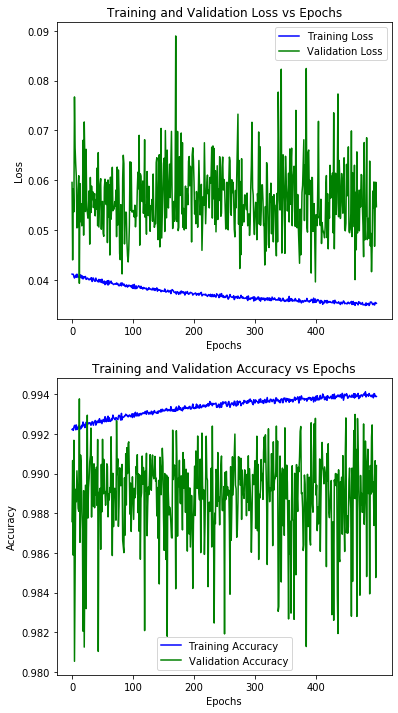

In [41]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.figure(figsize=(6,12))

plt.subplot(2,1,1)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,epochs)[0::100])
plt.title('Training and Validation Loss vs Epochs')
plt.legend()

plt.subplot(2,1,2)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc, 'blue', label='Training Accuracy')
plt.plot(val_acc, 'green', label='Validation Accuracy')
plt.xticks(range(0,epochs)[0::100])
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()
plt.savefig("plots_perf_abdo.svg")
plt.show()

In [55]:
plt.savefig("test.svg")

<Figure size 432x288 with 0 Axes>

In [65]:
model_abdo.load_weights('./best_weights_abdo_32layer.hdf5')
y_pred = model_abdo.predict(abdo_test)
predict_test=np.argmax(y_pred, axis=1)
predict_test=predict_test.reshape(predict_test.shape[0],1)
cm=confusion_matrix(y_test_num, predict_test)
cm

array([[50138,   230],
       [   17,  1351]], dtype=int64)

In [66]:
(cm[1,1]+cm[0,0])/(cm[1,1]+cm[1,0]+cm[0,0]+cm[0,1])

0.9952257615586826

In [67]:
cm[1,1]/(cm[1,1]+cm[1,0])

0.9875730994152047

In [68]:
cm[0,0]/(cm[0,0]+cm[0,1])

0.9954336086404066